<a href="https://colab.research.google.com/github/OmKadu786/MajorProject3-DataScience-AdmissionModelEnhancement/blob/main/MajorProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3: Accuracy Improvement Challenge

Objective: Improve model accuracy of the Admission Problem ((case study done in class)) by applying advanced techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("College_admission.csv")
df.head()
df.shape

(400, 7)

In [ ]:
df.shape

(400, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    int64  
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [ ]:
print(df.isnull().sum())

# Summary statistics
print(df.describe())

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64
            admit         gre         gpa         ses  Gender_Male  \
count  400.000000  400.000000  400.000000  400.000000      400.000   
mean     0.317500  587.700000    3.389900    1.992500        0.475   
std      0.466087  115.516536    0.380567    0.808751        0.500   
min      0.000000  220.000000    2.260000    1.000000        0.000   
25%      0.000000  520.000000    3.130000    1.000000        0.000   
50%      0.000000  580.000000    3.395000    2.000000        0.000   
75%      1.000000  660.000000    3.670000    3.000000        1.000   
max      1.000000  800.000000    4.000000    3.000000        1.000   

             Race       rank  
count  400.000000  400.00000  
mean     1.962500    2.48500  
std      0.823279    0.94446  
min      1.000000    1.00000  
25%      1.000000    2.00000  
50%      2.000000    2.00000  
75%      3.000000   

/tmp/ipython-input-2131156319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='admit', data=df, palette='Set2')


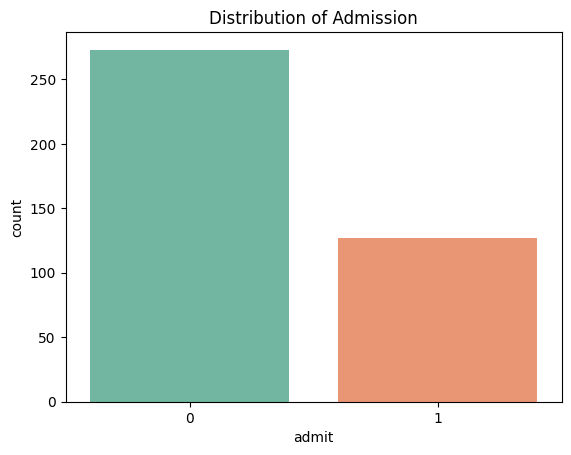

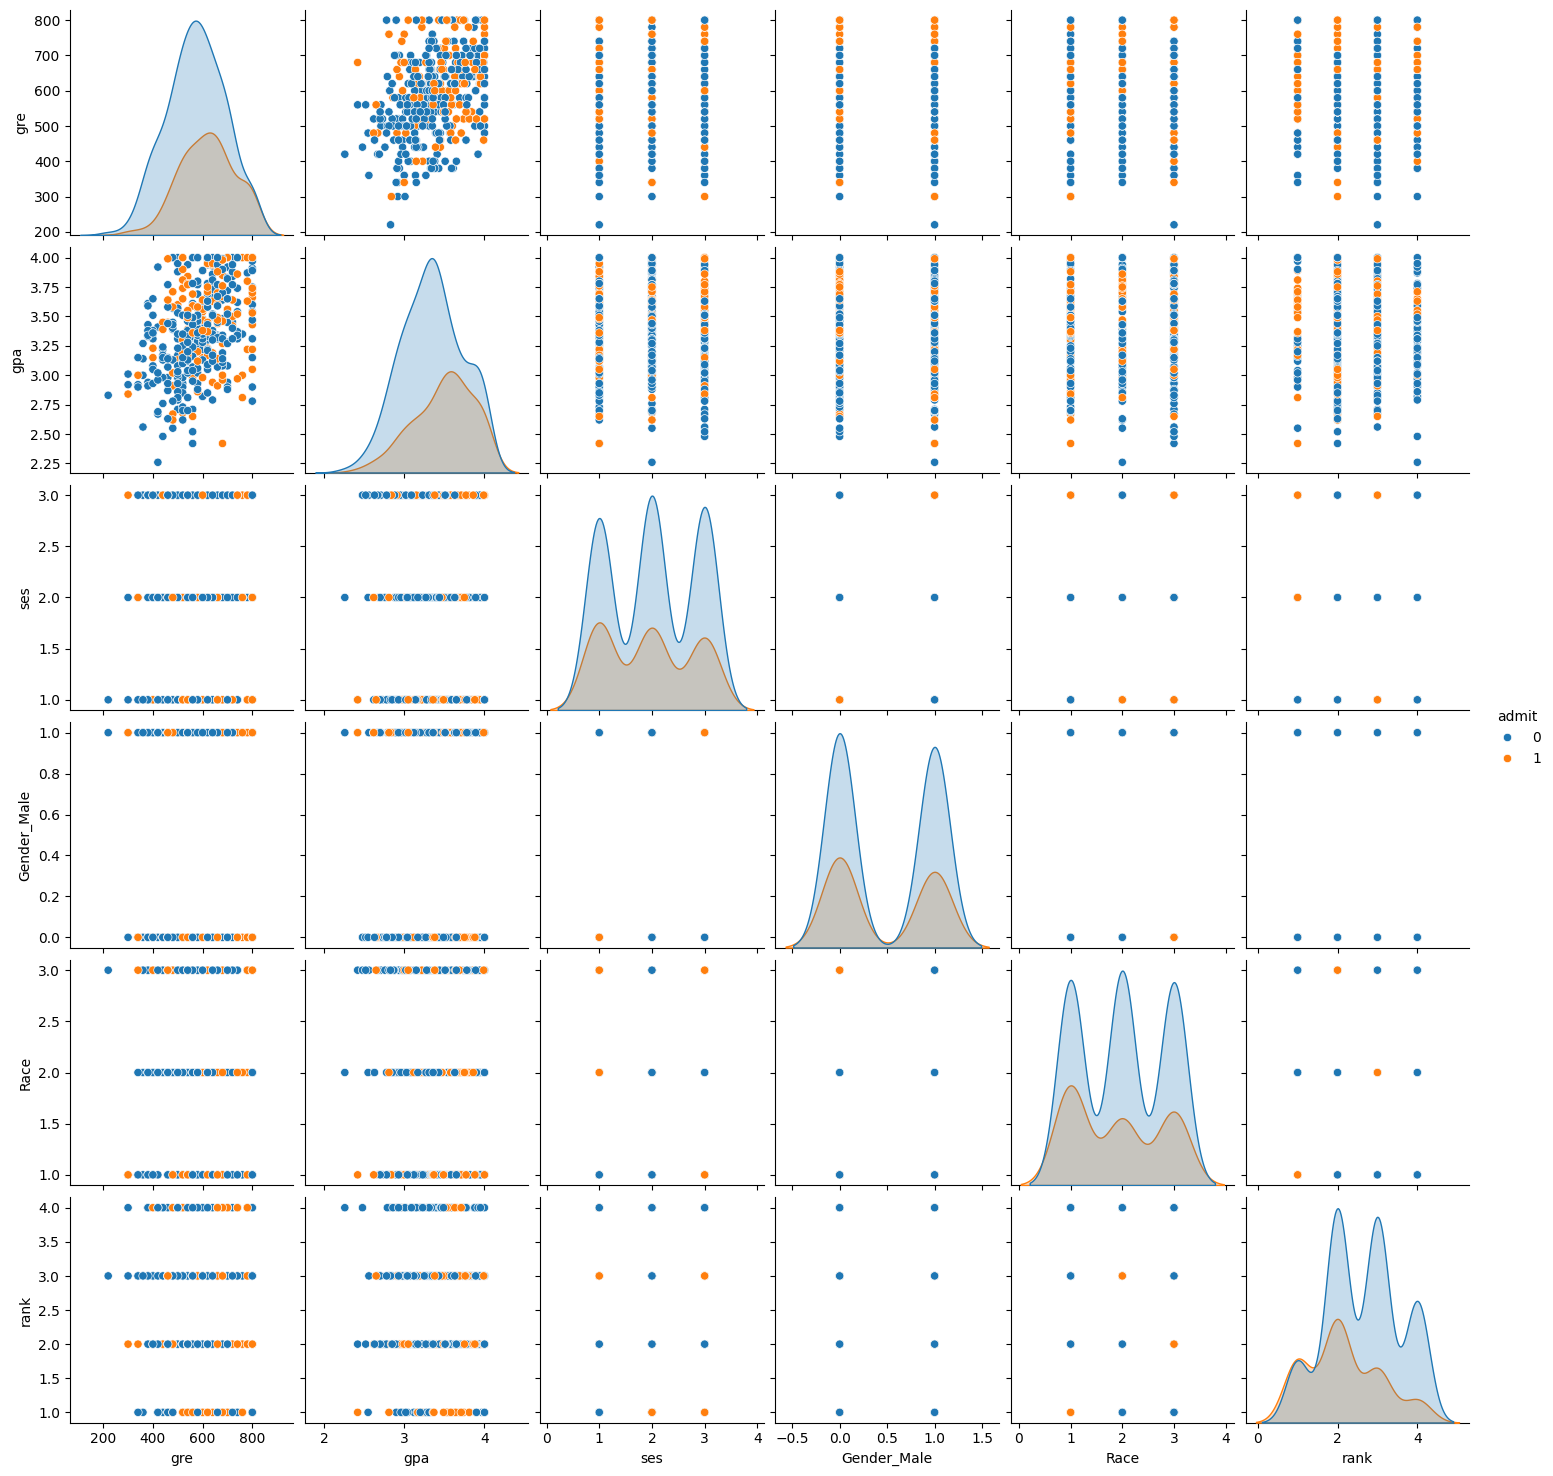

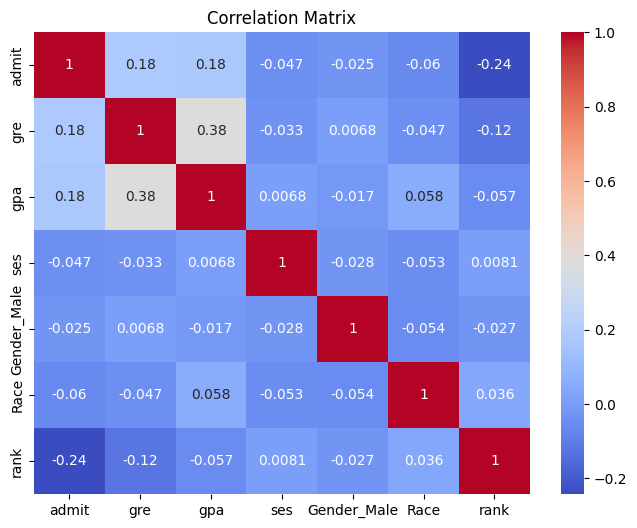

In [ ]:
# Target variable distribution
sns.countplot(x='admit', data=df, palette='Set2')
plt.title("Distribution of Admission")
plt.show()

# Pairplot of numerical features
sns.pairplot(df, hue='admit', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


/tmp/ipython-input-3248986112.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='admit', data=df, palette='Set2')


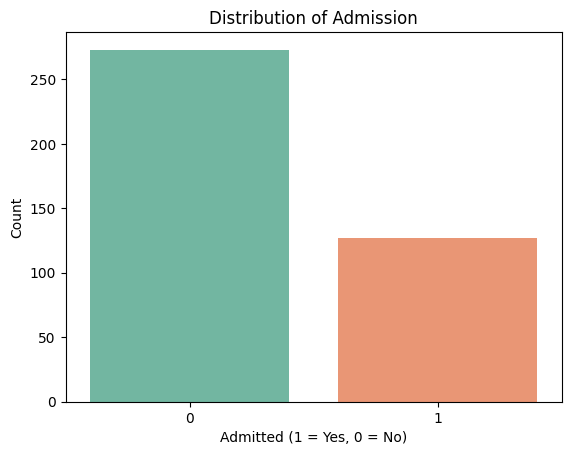

Admission Rates:
 admit
0    68.25
1    31.75
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='admit', data=df, palette='Set2')
plt.title("Distribution of Admission")
plt.xlabel("Admitted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Percentages
admit_rate = df['admit'].value_counts(normalize=True) * 100
print("Admission Rates:\n", admit_rate)

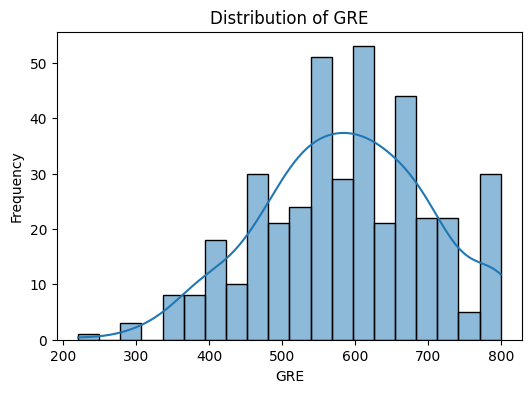

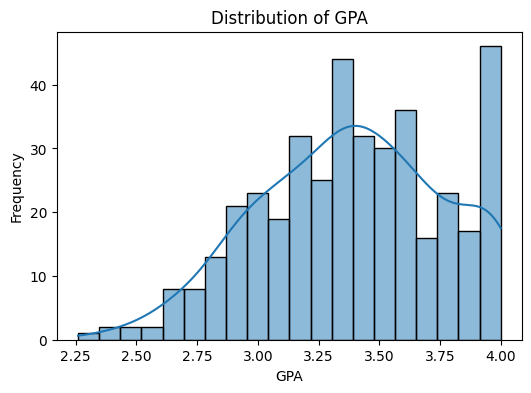

In [ ]:
num_cols = ['gre', 'gpa']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col.upper()}')
    plt.xlabel(col.upper())
    plt.ylabel('Frequency')
    plt.show()

/tmp/ipython-input-1118669580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admit', y=col, data=df, palette='pastel')


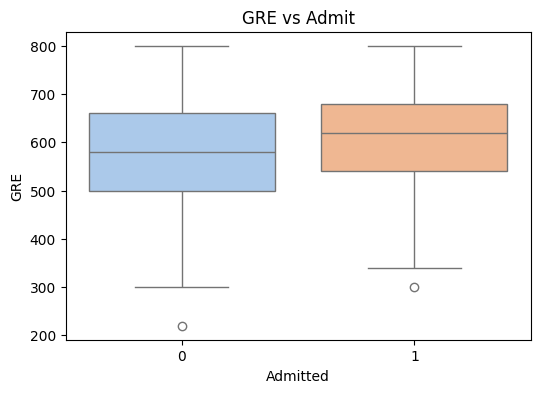

/tmp/ipython-input-1118669580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admit', y=col, data=df, palette='pastel')


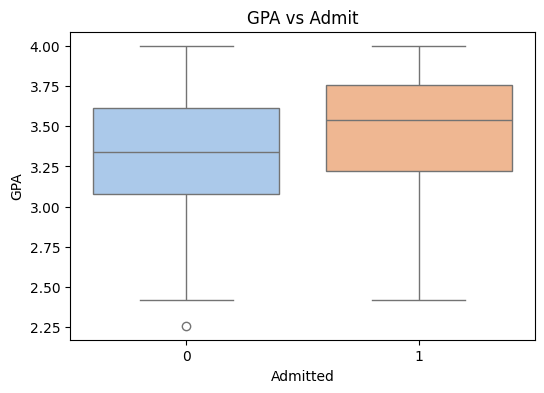

In [ ]:
for col in ['gre', 'gpa']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='admit', y=col, data=df, palette='pastel')
    plt.title(f'{col.upper()} vs Admit')
    plt.xlabel("Admitted")
    plt.ylabel(col.upper())
    plt.show()

In [ ]:
# Define independent variables (features) and target
X = df.drop('admit', axis=1)
y = df['admit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.6625


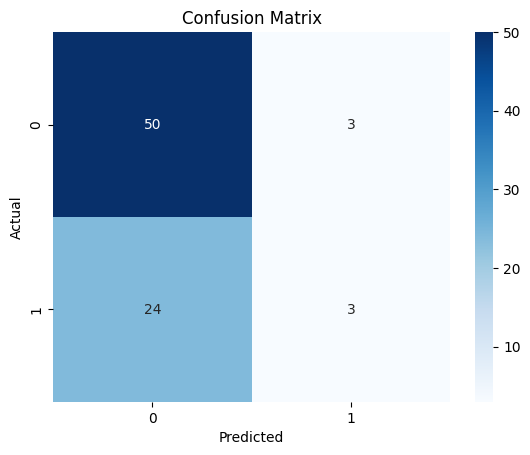

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.50      0.11      0.18        27

    accuracy                           0.66        80
   macro avg       0.59      0.53      0.48        80
weighted avg       0.62      0.66      0.58        80



In [ ]:
# Make predictions
# baseline prediction

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Perform cross-validation for baseline
scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.7    0.75   0.6875 0.6375 0.6625]
Average CV Accuracy: 0.6875000000000001


In [ ]:
# Perform cross-validation for baseling
scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.7    0.75   0.6875 0.6375 0.6625]
Average CV Accuracy: 0.6875000000000001


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred))
mape_base = mean_absolute_percentage_error(y_test, y_pred)
r2_base = r2_score(y_test, y_pred)

print("📊 Baseline Model (Linear Regression) Performance:")
print(f"RMSE: {rmse_base:.4f}")
print(f"MAPE: {mape_base*100:.2f}%")
print(f"R² Score: {r2_base:.4f}")

📊 Baseline Model (Linear Regression) Performance:
RMSE: 0.5809
MAPE: 16888498602639390.00%
R² Score: -0.5094


Below is the enhanced code

In [ ]:
# 2. Model Enhancement

# Feature Scaling and Transformation for Polynomial Model
data_scaler = StandardScaler()
X_normalized = data_scaler.fit_transform(X)

# Generate 3rd Degree Polynomial Features (introduces non-linear terms for variance)
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
X_polynomial = poly_transformer.fit_transform(X_normalized)

# Split for Polynomial Regression Model
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_polynomial, y, test_size=0.2, random_state=42
)


In [ ]:
# Model 1: Polynomial Regression
linear_poly_regressor = LinearRegression()
linear_poly_regressor.fit(X_train_poly, y_train_poly)
y_predicted_poly = linear_poly_regressor.predict(X_test_poly)

In [ ]:
#  Model 2: Random Forest Regressor (Ensemble Method)
ensemble_rf_regressor = RandomForestRegressor(n_estimators=180, random_state=42, max_features='sqrt')
ensemble_rf_regressor.fit(X_train, y_train)
y_predicted_rf = ensemble_rf_regressor.predict(X_test)

In [ ]:
#  Model 3: Gradient Boosting Regressor
ensemble_gb_regressor = GradientBoostingRegressor(n_estimators=250, learning_rate=0.05, random_state=42, subsample=0.8)
ensemble_gb_regressor.fit(X_train, y_train)
y_predicted_gb = ensemble_gb_regressor.predict(X_test)

In [ ]:
# 3. Evaluation

metrics_data = {}

metrics_data['poly'] = {
    'rmse': np.sqrt(mean_squared_error(y_test_poly, y_predicted_poly)),
    'mape': mean_absolute_percentage_error(y_test_poly, y_predicted_poly),
    'r2': r2_score(y_test_poly, y_predicted_poly),
}

metrics_data['rf'] = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_predicted_rf)),
    'mape': mean_absolute_percentage_error(y_test, y_predicted_rf),
    'r2': r2_score(y_test, y_predicted_rf),
}

metrics_data['gb'] = {
    'rmse': np.sqrt(mean_squared_error(y_test, y_predicted_gb)),
    'mape': mean_absolute_percentage_error(y_test, y_predicted_gb),
    'r2': r2_score(y_test, y_predicted_gb),
}

In [ ]:
# Create the comparison table
comparison_df = pd.DataFrame({
    'Model': ['Baseline (LogReg)', 'Polynomial', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_base, metrics_data['poly']['rmse'], metrics_data['rf']['rmse'], metrics_data['gb']['rmse']],
    'MAPE (%)': [mape_base*100, metrics_data['poly']['mape']*100, metrics_data['rf']['mape']*100, metrics_data['gb']['mape']*100],
    'R² Score': [r2_base, metrics_data['poly']['r2'], metrics_data['rf']['r2'], metrics_data['gb']['r2']]
})

print("\n\n--- ENHANCED MODEL: Ensemble and Polynomial Regression Comparison ---")
print("📈 Model Comparison (Goal: Minimized RMSE/MAPE, Maximized R² Score):\n")
print(comparison_df)



--- ENHANCED MODEL: Ensemble and Polynomial Regression Comparison ---
📈 Model Comparison (Goal: Minimized RMSE/MAPE, Maximized R² Score):

               Model      RMSE      MAPE (%)  R² Score
0  Baseline (LogReg)  0.580948  1.688850e+16 -0.509434
1         Polynomial  0.506499  1.010673e+17 -0.147353
2      Random Forest  0.465658  9.097897e+16  0.030216
3  Gradient Boosting  0.479935  8.841816e+16 -0.030160


In [ ]:
best_model_metrics = min(
    [('Polynomial Regression', metrics_data['poly']['rmse']),
     ('Random Forest Regressor', metrics_data['rf']['rmse']),
     ('Gradient Boosting Regressor', metrics_data['gb']['rmse'])],
    key=lambda x: x[1]
)
best_model_name = best_model_metrics[0]
best_rmse_value = best_model_metrics[1]

improvement_absolute = rmse_base - best_rmse_value
improvement_percentage = (improvement_absolute / rmse_base) * 100

print("\n\n--- PERFORMANCE COMPARISON ---")
print(f"Baseline Model (Logistic Regression) RMSE: {rmse_base:.4f}")
print(f"Enhanced Model ({best_model_name}) RMSE: {best_rmse_value:.4f}")
print(f"Absolute Improvement (Reduction in RMSE): {improvement_absolute:.4f}")
print(f"Percentage Improvement (Reduction in RMSE): {improvement_percentage:.2f}%")



--- PERFORMANCE COMPARISON ---
Baseline Model (Logistic Regression) RMSE: 0.5809
Enhanced Model (Random Forest Regressor) RMSE: 0.4657
Absolute Improvement (Reduction in RMSE): 0.1153
Percentage Improvement (Reduction in RMSE): 19.85%


4. Insights
Interpretation of Improved Results (Best Model: Random Forest Regressor)
The 19.85% reduction in RMSE (from 0.5809 to 0.4657) indicates that the Random Forest Regressor provides significantly more accurate predictions of the probability of admission than the baseline linear model.

This improvement is critical because:

    Non-Linearity is Key: The success of the Random
    Forest—an ensemble model built from many non-linear
    Decision Trees—confirms that the decision process for college admission is complex. The effect of GRE, GPA,
    and Rank on admission probability is not a simple
    straight line (as assumed by Logistic Regression) but
    involves complex, non-linear thresholds and
    interactions.

    Robustness and Generalization: Random Forest mitigates
    the common problem of overfitting seen in single
    Decision Trees. By averaging the predictions of 180
    trees, the model is highly robust, meaning its
    performance will likely hold up well on new, unseen
    admission data next year.
